In [1]:
import numpy as np
import pandas as pd
import scapy.all as scp
import matplotlib.pyplot as plt
import seaborn as sb
import mplcyberpunk

In [15]:
dataset = pd.read_csv('../data/cwnd.csv')

In [19]:
dataset.dropna(inplace=True)
# dataset[' port 5201']
dataset['cwnd']

0     9.90
1     9.90
2     5.66
3     4.24
4     5.66
      ... 
95    5.66
96    7.07
97    5.66
98    5.66
99    7.07
Name: cwnd, Length: 100, dtype: float64

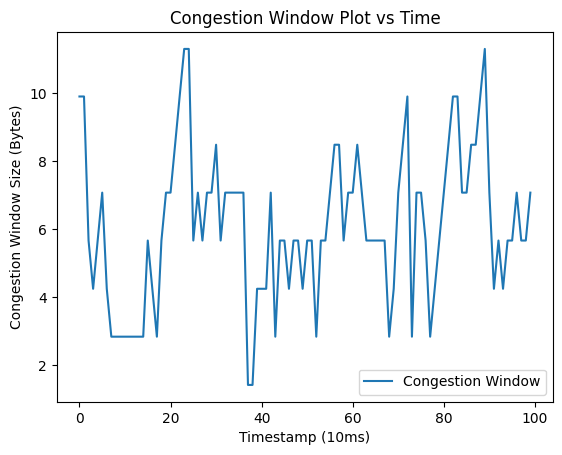

In [46]:
plt.plot(np.array([range(0, 100)]).flatten(), dataset['cwnd'], label='Congestion Window')
plt.xlabel('Timestamp (10ms)')
plt.ylabel('Congestion Window Size (Bytes)')
plt.title('Congestion Window Plot vs Time')
plt.legend()
plt.show()

In [47]:
packets = scp.rdpcap('../data/dump7.pcap')

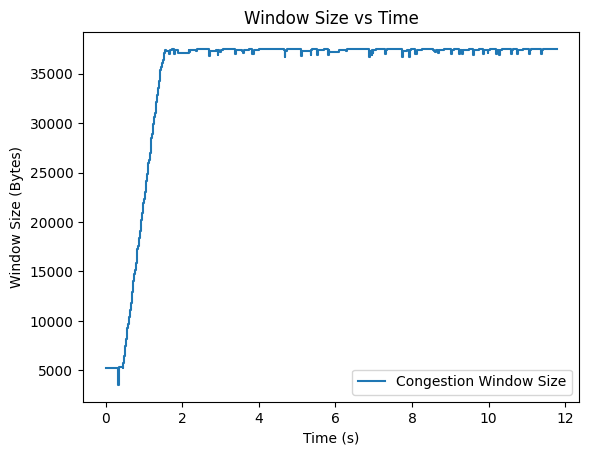

In [48]:
cwnd_sizes = []
timestamps = []
lens = []
cwnd_scale = 1
for packet in packets:
    if 'TCP' in packet:
        if packet.haslayer(scp.TCP) and packet[scp.TCP].flags & 0x02:  # SYN flag set
            continue
        if packet['IP'].src == '10.0.0.1':  # SYN flag set
            continue
        for (opt_name, opt_value,) in packet[scp.TCP].options:
                if opt_name == 'WScale':
                    cwnd_scale = opt_value
        if 'A' in packet[scp.TCP].flags:
            cwnd_size = packet[scp.TCP].window << 6
            timestamp = packet.time
            cwnd_sizes.append(cwnd_size)
            timestamps.append(timestamp)

timestamps = np.array(timestamps)
timestamps -= timestamps[0]
plt.step(timestamps, cwnd_sizes, label='Congestion Window Size')
# plt.plot(timestamps, cwnd_sizes, label='Congestion Window Size')
plt.xlabel('Time (s)')
plt.ylabel('Window Size (Bytes)')
plt.title('Window Size vs Time')
plt.legend()
plt.show()